In [6]:
pip install pandas numpy matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 522.0 kB/s eta 0:00:14
   ------ --------------------------------- 1.3/8.1 MB 864.2 kB/s eta 0:00:08
   --------- ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
 df = pd.read_csv("Expanded_data_with_more_features.csv")
 print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [10]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [11]:
df = df.drop("Unnamed: 0", axis =1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [12]:
#change weekly study hours column
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct" , "5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


C:\Users\milli\AppData\Local\Temp\ipykernel_14488\1892934625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="Set2")


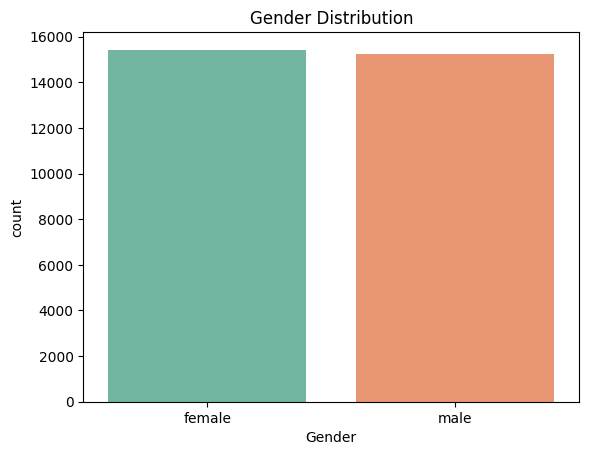

In [13]:
#Gender Distriution
sns.countplot(data=df, x="Gender", palette="Set2")
plt.title("Gender Distribution")
plt.show()

In [14]:
gb = df.groupby("ParentEduc").agg({"MathScore": 'mean',"ReadingScore":'mean' , "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


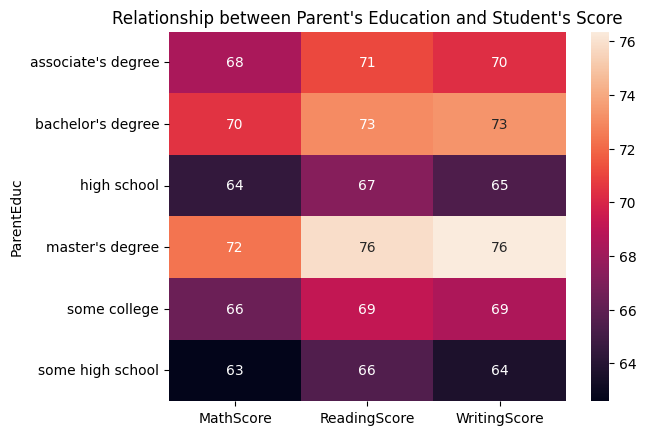

In [18]:
sns.heatmap(gb , annot = True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

In [16]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean',"ReadingScore":'mean' , "WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


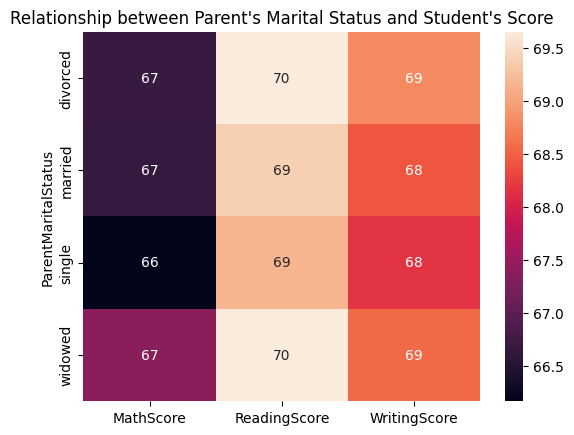

In [19]:
sns.heatmap(gb1 , annot = True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

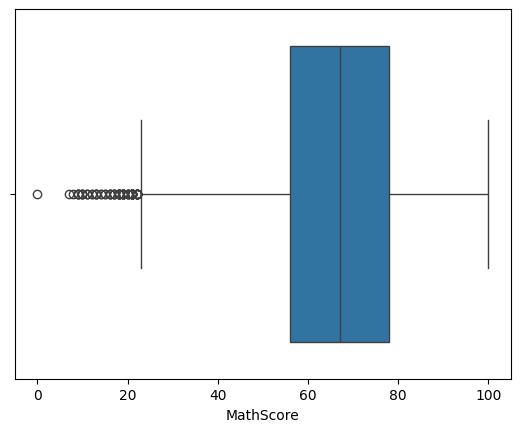

In [20]:
sns.boxplot(data = df , x ="MathScore")
plt.show()


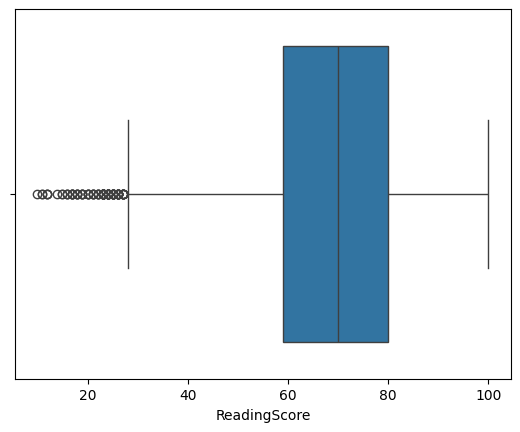

In [21]:
sns.boxplot(data = df , x ="ReadingScore")
plt.show()


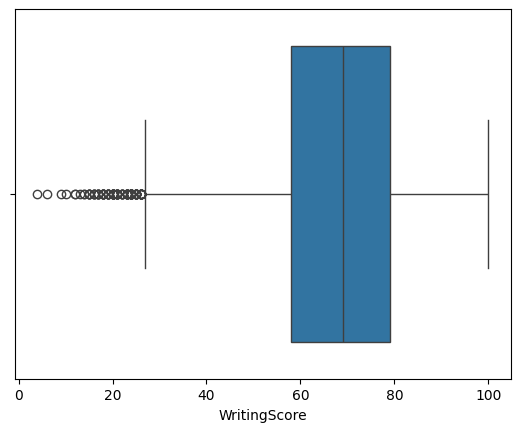

In [22]:
sns.boxplot(data = df , x ="WritingScore")
plt.show()


In [23]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


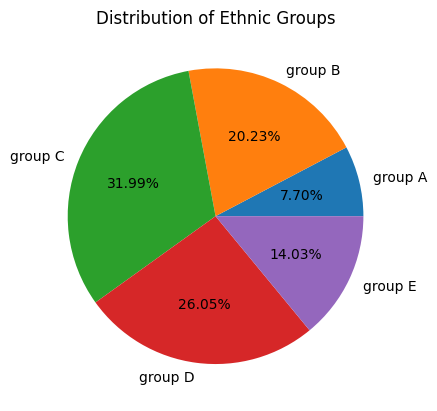

In [35]:
groupA = df.loc[(df['EthnicGroup']== "group A")].count()
groupB = df.loc[(df['EthnicGroup']== "group B")].count()
groupC = df.loc[(df['EthnicGroup']== "group C")].count()
groupD = df.loc[(df['EthnicGroup']== "group D")].count()
groupE = df.loc[(df['EthnicGroup']== "group E")].count()

l = ["group A" , "group B" , "group C" ,"group D" ,"group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist ,labels = l  , autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

C:\Users\milli\AppData\Local\Temp\ipykernel_14488\2602098785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='EthnicGroup', palette='Set2')


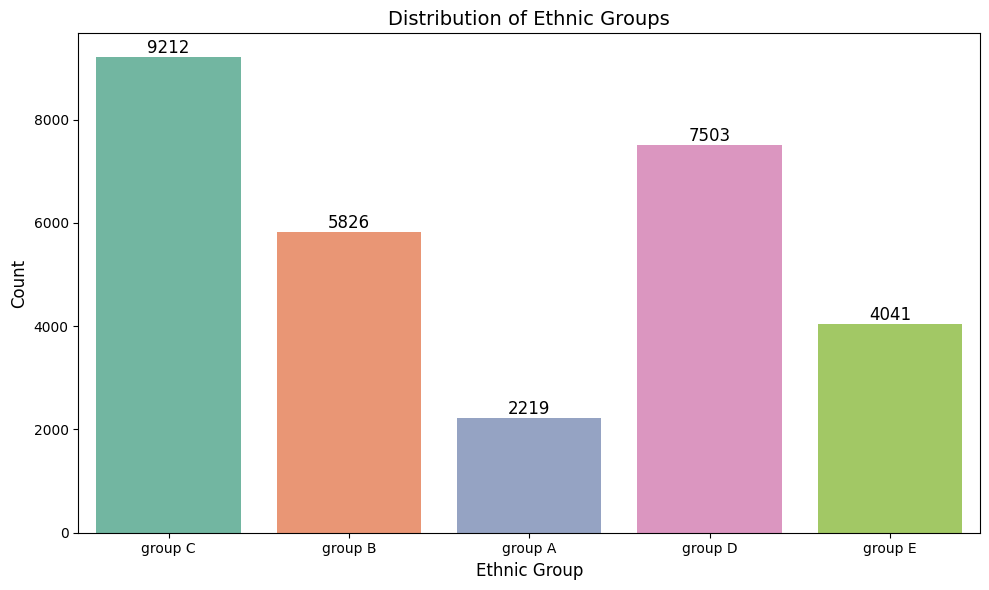

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='EthnicGroup', palette='Set2')

# Add labels to each bar (check all containers)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title("Distribution of Ethnic Groups", fontsize=14)
plt.xlabel("Ethnic Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()  # Prevent overlap
plt.show()
